In [1]:
from IPython.display import Image

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd

In [3]:
iris = datasets.load_iris()

In [4]:
data = iris['data']

In [5]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
df = pd.DataFrame(data, columns = iris['feature_names'])

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target'] = iris['target']

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)

data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)' : 'petal width (cm)'])

pca_data = pca.fit_transform(data_scaled)

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
data_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [14]:
pca_data[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [15]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

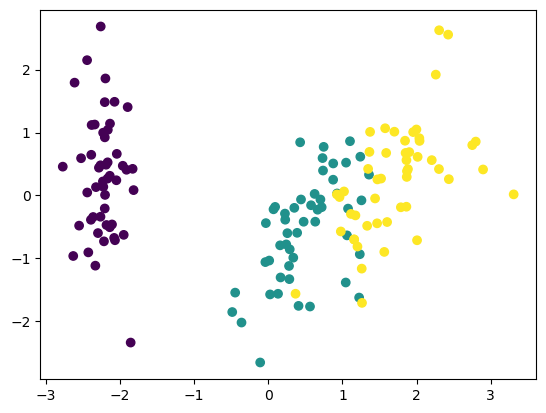

In [16]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'])

In [17]:
#분산을 기준으로 차원축소(n_components < 1)
pca2 = PCA(n_components=0.99)
pca_data2 = pca2.fit_transform(data_scaled)
pca_data2[:5]

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ]])

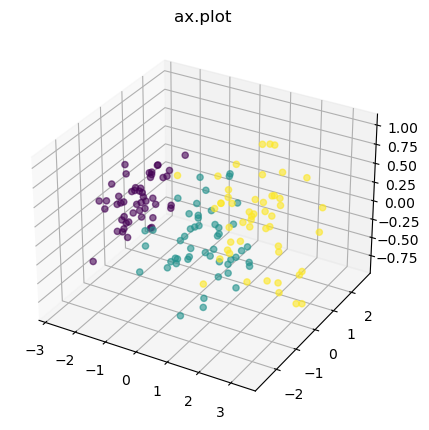

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

sample_size = 50
ax.scatter(pca_data2[:, 0], pca_data2[:,1], pca_data2[:,2], alpha=0.6, c=df['target'])
plt.savefig('./tmp.svg')
plt.title('ax.plot')
plt.show()

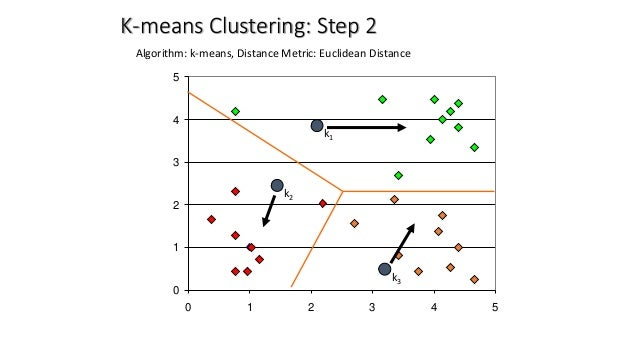

In [19]:
Image('https://image.slidesharecdn.com/patternrecognitionbinoy-06-kmeansclustering-160317135729/95/pattern-recognition-binoy-k-means-clustering-13-638.jpg')

In [20]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)' : 'petal width (cm)'])
cluster_data = kmeans.fit_transform(data_scaled)

C:\Users\CAL\Anaconda3\envs\tensorflow_v2\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\CAL\Anaconda3\envs\tensorflow_v2\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
cluster_data[:5]

array([[3.98940603, 0.21295824, 3.12119834],
       [4.01793312, 0.99604549, 2.6755083 ],
       [4.19343668, 0.65198444, 2.97416665],
       [4.19784749, 0.9034561 , 2.88014429],
       [4.11157152, 0.40215457, 3.30022609]])

In [25]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

<AxesSubplot:ylabel='count'>

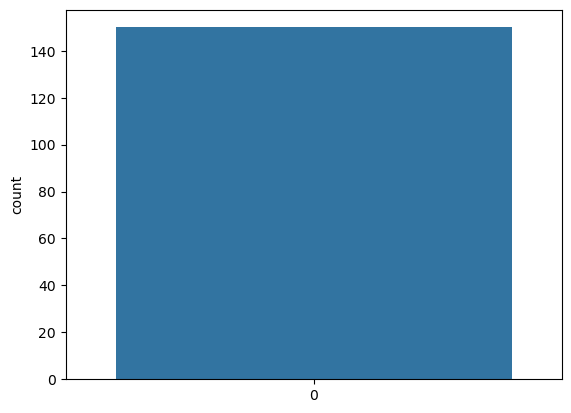

In [26]:
sns.countplot(kmeans.labels_)

<AxesSubplot:ylabel='count'>

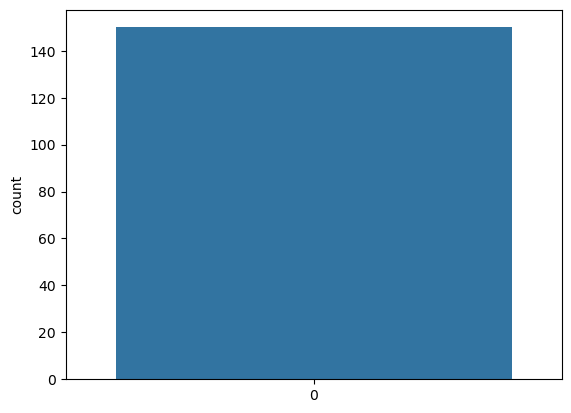

In [27]:
sns.countplot(df['target'])

In [28]:
kmeans

KMeans(algorithm='auto', n_clusters=3)

In [30]:
kmeans2 = KMeans(n_clusters=3, max_iter=500)
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)' : 'petal width (cm)'])
cluser_data2 = kmeans2.fit_transform(data_scaled)

C:\Users\CAL\Anaconda3\envs\tensorflow_v2\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:ylabel='count'>

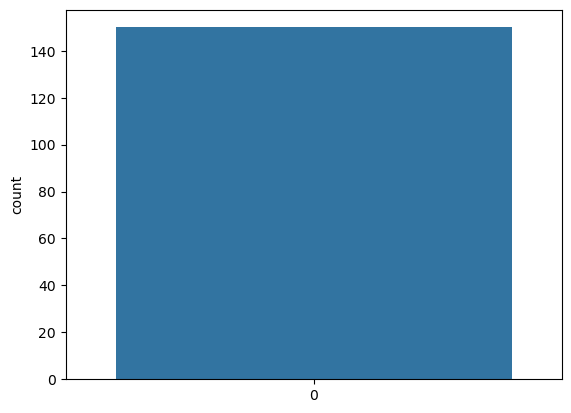

In [31]:
sns.countplot(kmeans2.labels_)